# 📊 Laboratorio 9 - Visualización de Datos
## <font size=4> *CC3084 - Data Science*, 2024 </font>
## <font size=3 color='gray'> Samuel Chamale y Adrian Rodriguez</font>

<div class="alert alert-block alert-warning">
<b>Nota:</b> Al utilizar visualizaciones dinámicas con Plotly, la previsualización no es posible. Es por eso que decidimos incluir imagenes de los resultados para evitar al calificador la ejecución del notebook.
</div>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
def convert_to_raw_url(github_url):
    """
    Convierte una URL estándar de GitHub a una URL raw.

    Parámetros:
    github_url (str): La URL estándar de GitHub del archivo.

    Retorna:
    str: La URL raw correspondiente.

    Ejemplo:
    >>> convert_to_raw_url('https://github.com/usuario/repositorio/blob/main/carpeta/archivo.csv')
    'https://raw.githubusercontent.com/usuario/repositorio/main/carpeta/archivo.csv'
    """
    # Verificar si la URL contiene '/blob/'
    if '/blob/' not in github_url:
        raise ValueError("La URL proporcionada no parece ser una URL válida de GitHub con '/blob/'.")

    # Reemplazar espacios en blanco por '%20'
    github_url = github_url.replace(' ', '%20')

    # Reemplazar 'github.com' por 'raw.githubusercontent.com' y eliminar '/blob'
    raw_url = github_url.replace('https://github.com/', 'https://raw.githubusercontent.com/')
    raw_url = raw_url.replace('/blob/', '/')

    return raw_url

In [13]:
BASE_URL = 'https://github.com/UVG-Works-Hub/data-visualization/blob/main/'

---

## 1. Emisiones Históricas de CO₂ 🌍

### a) Exploración de los Datos 📈

Comenzamos cargando y explorando el conjunto de datos historical_emissions.csv, que contiene las emisiones históricas de CO₂ a nivel mundial desde 1990 hasta 2018.

In [14]:
# Cargar los datos
emissions_df = pd.read_csv(convert_to_raw_url(BASE_URL + 'data/emissions/historical_emissions.csv'))

# Mostrar las primeras filas
emissions_df.head()

,Country,Data source,Sector,Gas,Unit,2018,2017,2016,2015,2014,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Total including LUCF,CO2,MtCO₂e,36441.55,35588.70,35160.60,34521.91,34558.59,...,24957.30,24895.32,25292.92,24214.92,23890.22,23260.29,23124.00,22988.29,23056.40,22849.92
1,China,CAIT,Total including LUCF,CO2,MtCO₂e,9663.36,9367.67,9164.21,9120.27,9184.77,...,2799.84,2882.75,2779.27,2715.50,2735.48,2414.50,2294.12,2068.77,1952.78,1823.96
2,United States,CAIT,Total including LUCF,CO2,MtCO₂e,4749.57,4581.90,4656.84,4563.52,4683.35,...,5191.66,5172.06,5129.29,4864.46,4708.31,4654.52,4581.76,4461.62,4389.50,4426.40
3,European Union (27),CAIT,Total including LUCF,CO2,MtCO₂e,2636.99,2692.12,2669.54,2321.61,2263.78,...,3079.46,3134.03,3142.23,3210.93,3113.68,3060.09,3072.40,3133.06,3247.48,3286.44
4,India,CAIT,Total including LUCF,CO2,MtCO₂e,2400.25,2267.16,2149.01,2085.38,2072.03,...,683.00,618.73,600.38,555.60,519.98,466.79,431.31,409.09,386.17,341.32


### b) Mensaje Clave 📌

Queremos mostrar la tendencia de las emisiones mundiales de CO₂ desde 1990 hasta 2018, destacando los eventos globales clave que pueden haber influido en el comportamiento de las emisiones y resaltando el incremento porcentual desde el primer año hasta el último.

### c) Tipo de Gráfica Elegida 📊

Optamos por un gráfico de líneas interactivo que muestre la evolución anual de las emisiones de CO₂. Esto permite una clara visualización de la tendencia a lo largo del tiempo, con la capacidad de explorar hitos importantes y el incremento porcentual acumulado.

### d) Creación de la Gráfica en Python 🖥️

In [15]:
# Preparar los datos
years = list(map(int, emissions_df.columns[5:]))  # Columnas de años
emissions = emissions_df.iloc[0, 5:].astype(float)  # Emisiones para 'World'

# Definir hitos clave
hitos = {
    1997: 'Protocolo de Kioto en Vigor',
    2008: 'Crisis Financiera Global',
    2015: 'Acuerdo de París'
}

# Crear el gráfico de líneas con Plotly Express
fig = px.line(x=years, y=emissions,
              labels={'x': 'Año', 'y': 'Emisiones de CO₂ (MtCO₂e)'},
              title='Evolución de las Emisiones Mundiales de CO₂ (1990-2018)',
              markers=True)

# Añadir los hitos como anotaciones sin afectar la leyenda
for year, label in hitos.items():
    emission_value = emissions[years.index(year)]
    fig.add_annotation(
        x=year,
        y=emission_value,
        text=label,
        showarrow=True,
        arrowhead=0,
        ax=0,
        ay=-50,
        font=dict(size=12, color="black"),
        arrowcolor="orange"
    )

# Optimizar la gráfica
fig.update_layout(
    template='plotly_white',
    hovermode='x unified',
    showlegend=False  # Ocultar el botón de leyenda a la derecha
)

# Cálculo del incremento porcentual
incremento = abs((emissions.iloc[-1] - emissions.iloc[0]) / emissions.iloc[0]) * 100
incremento_texto = f"{incremento:.2f}% ↑"

last_idx = len(emissions) - 1

# Añadir línea vertical en el último año (2018), que vaya desde el mínimo hasta el máximo de las emisiones
fig.add_shape(
    type="line",
    x0=years[0], y0=emissions.iloc[0],  # Desde el valor del primer año
    x1=years[0], y1=emissions.iloc[-1],  # Hasta el valor del último año
    line=dict(color="green", width=2, dash="dash")
)

# Añadir anotación con el incremento en el último punto con un fondo blanco
fig.add_annotation(
    x=years[0],
    y=emissions.iloc[14],
    text=incremento_texto,  # Texto con el porcentaje y la flecha hacia arriba
    showarrow=False,
    arrowhead=0,
    ax=-80,  # Ajuste de la posición de la flecha hacia la izquierda
    ay=0,
    font=dict(size=12, color="green"),
    bgcolor="white",  # Fondo blanco para evitar traslape visual
    bordercolor="white",
    borderwidth=1
)



fig.show()

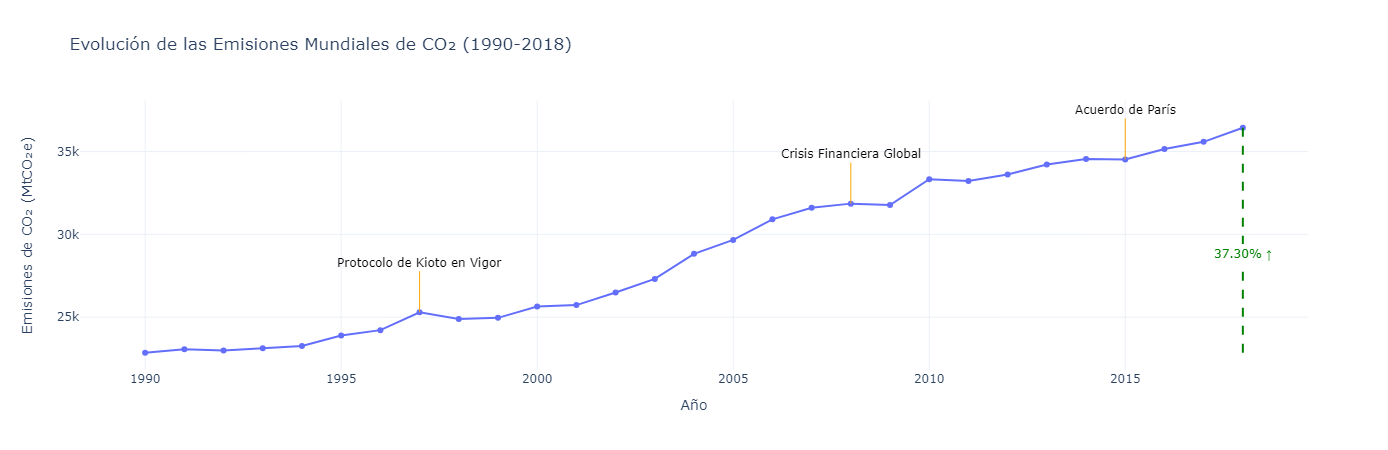

### e) Optimización de la Gráfica para Reducir la Carga Cognitiva 🧠

- **Etiquetas y colores claros**: Se utilizaron etiquetas claras y un color verde para la línea de incremento, evitando distracciones visuales.
- **Anotaciones para eventos clave**: Se añadieron hitos como el Protocolo de Kioto, la Crisis Financiera Global y el Acuerdo de París, facilitando la contextualización de los cambios en la serie temporal.
- **Interactividad**: La gráfica es interactiva, permitiendo al usuario explorar datos específicos en los puntos de interés y obtener detalles precisos.

### f) Explicación de Decisiones 💡

La elección de un gráfico de líneas fue motivada por la necesidad de mostrar una tendencia a lo largo del tiempo y facilitar la identificación de patrones y cambios en las emisiones de CO₂. Al incorporar eventos clave mediante anotaciones y un cálculo del incremento porcentual acumulado, los usuarios pueden interpretar mejor el contexto y la magnitud del cambio en las emisiones globales. La adición de un fondo blanco en el texto del incremento ayuda a evitar el traslape visual con la línea de incremento, mejorando la legibilidad de la información.

---

## 2. Títulos de Netflix 📺

### a) Exploración de los Datos 🔍

El conjunto de datos `netflix_titles.csv` contiene información sobre los títulos disponibles en Netflix, incluyendo películas y series, con detalles como género, país de origen, año de lanzamiento, etc.

In [16]:
# Cargar los datos
netflix_df = pd.read_csv(convert_to_raw_url(BASE_URL + 'data/netflix/netflix_titles.csv'))

# Mostrar las primeras filas
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### b) Mensaje Clave 📌

Queremos visualizar la distribución jerárquica de géneros en Netflix para entender cómo se categorizan los títulos y cuáles son los géneros predominantes dentro de cada categoría principal.

### c) Tipo de Gráfica Elegida 📊

Optamos por un **gráfico de Sankey** que permite representar las relaciones entre géneros principales y sus subgéneros más destacados de manera clara y eficiente. Este tipo de visualización facilita la identificación de las conexiones y flujos entre las categorías, destacando los géneros más relevantes sin sobrecargar la gráfica.

### d) Creación de la Gráfica en Python 🖥️

In [17]:
# Dividir los géneros en principales y secundarios
netflix_df['Primary Genre'] = netflix_df['listed_in'].str.split(', ').str[0]
netflix_df['Secondary Genre'] = netflix_df['listed_in'].str.split(', ').str[1]

# Contar la cantidad de títulos por género principal y secundario
genre_hierarchy = netflix_df.groupby(['Primary Genre', 'Secondary Genre']).size().reset_index(name='Count')

# Filtrar para incluir solo los géneros principales prominentes
threshold = 750  # Ajustar según la cantidad de datos para seleccionar géneros prominentes
prominent_genres = genre_hierarchy.groupby('Primary Genre')['Count'].sum()
prominent_genres = prominent_genres[prominent_genres >= threshold].index

# Filtrar los datos para mostrar solo los géneros prominentes
filtered_genre_hierarchy = genre_hierarchy[genre_hierarchy['Primary Genre'].isin(prominent_genres)]

# Seleccionar solo los 3 géneros secundarios más relevantes para cada género principal
top_secondary_genres = (
    filtered_genre_hierarchy.groupby('Primary Genre')
    .apply(lambda x: x.nlargest(3, 'Count'))
    .reset_index(drop=True)
)

# Crear listas de nodos y enlaces para el diagrama de Sankey
all_genres = pd.concat([top_secondary_genres['Primary Genre'], top_secondary_genres['Secondary Genre']]).unique()
genre_index = {genre: i for i, genre in enumerate(all_genres)}

# Listas de nodos y links
source = top_secondary_genres['Primary Genre'].map(genre_index).tolist()
target = top_secondary_genres['Secondary Genre'].map(genre_index).tolist()
value = top_secondary_genres['Count'].tolist()

# Crear el diagrama de Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(genre_index.keys())
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    ))])

fig.update_layout(title_text="Distribución de Géneros en Netflix: Géneros Principales y Subgéneros Destacados", font_size=10)
fig.show()

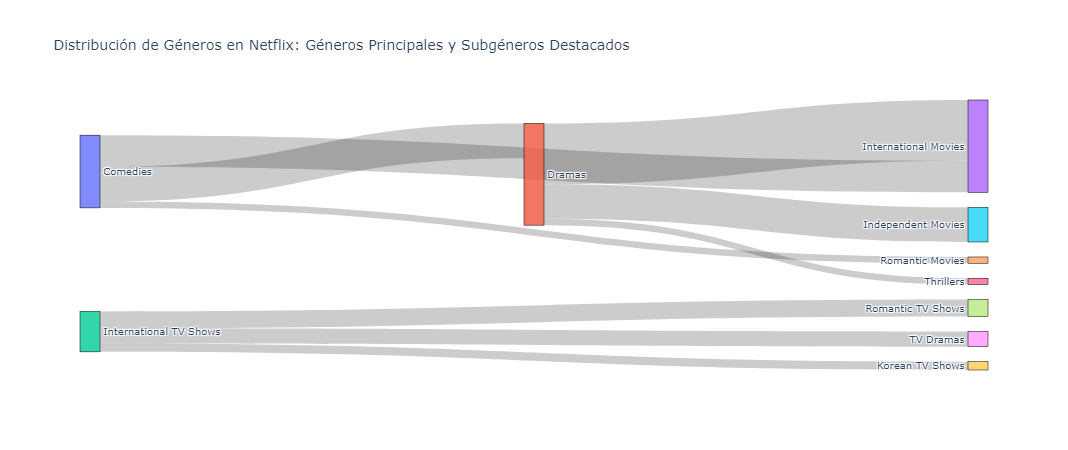


### e) Optimización de la Gráfica para Reducir la Carga Cognitiva 🧠

- **Selección de géneros prominentes**: Al filtrar solo los géneros principales con una cantidad significativa de títulos, se evita la saturación de información.
- **Top subgéneros relevantes**: Mostrar únicamente los 3 subgéneros más relevantes por cada género principal simplifica la visualización y resalta las categorías más importantes.
- **Colores diferenciados**: Utilizar una paleta de colores distintiva para los nodos ayuda a distinguir fácilmente entre géneros principales y secundarios.
- **Interactividad**: Permite a los usuarios explorar las conexiones entre géneros de manera dinámica, facilitando la comprensión de la distribución.
- **Etiquetas claras y concisas**: Aseguran que la información sea fácilmente legible sin sobrecargar la gráfica.

### f) Explicación de Decisiones 💡

El gráfico de Sankey es ideal para representar flujos y relaciones entre categorías, en este caso, entre géneros principales y sus subgéneros más destacados en Netflix. Al optar por Sankey en lugar de un diagrama de Sunburst (el cual fue nuestra primera opción), logramos una representación más clara de las conexiones y la magnitud de cada relación, especialmente cuando se filtran los géneros prominentes y sus subcategorías más relevantes. Esta elección mejora la legibilidad y facilita la identificación de los géneros más comunes y cómo se subdividen, manteniendo la claridad y reduciendo la carga cognitiva para el usuario. Además, la interactividad del gráfico de Sankey permite una exploración más dinámica de los datos, lo que enriquece la experiencia de análisis.

---

## 3. Ventas de Productos 🚚

### a) Exploración de los Datos 📊

El archivo `train.csv` contiene información sobre pedidos de clientes, incluyendo detalles como fecha de pedido, modo de envío, categoría de producto y ventas.

In [18]:
# Cargar los datos
train_df = pd.read_csv(convert_to_raw_url(BASE_URL + 'data/superstone/train.csv'))

# Mostrar las primeras filasa
train_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### b) Mensaje Clave 📌

Queremos identificar cuál es la **distribución de las ventas en función de la categoría de producto** y **el segmento de clientes**. Esto ayudará a entender en qué segmentos y categorías se concentran las ventas, apoyando la toma de decisiones estratégicas en marketing y gestión de inventarios.

### c) Tipo de Gráfica Elegida 📊

Optamos por un **gráfico de barras agrupado** con Plotly para mostrar las ventas por categoría de producto en función de los segmentos de clientes (Consumidor, Corporativo, y Hogar). Este tipo de gráfico es claro y permite comparaciones precisas entre categorías y segmentos, respetando los principios de la Gestalt como **proximidad** y **similitud**.

### d) Creación de la Gráfica en Python 🖥️

In [19]:
import plotly.express as px

# Preparar los datos: sumar las ventas por categoría y segmento
sales_data = train_df.groupby(['Category', 'Segment'])['Sales'].sum().reset_index()

# Crear el gráfico de barras agrupado con etiquetas
fig = px.bar(
    sales_data,
    x='Category',
    y='Sales',
    color='Segment',
    barmode='group',
    title='Ventas por Categoría de Producto y Segmento de Cliente',
    labels={'Sales': 'Ventas Totales', 'Category': 'Categoría de Producto'},
    color_discrete_sequence=px.colors.qualitative.Plotly,
    text='Segment'  # Añadir etiquetas de segmento
)

# Optimizar el diseño y posicionar las etiquetas
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Ventas Totales',
    legend_title_text='Segmento de Cliente',
    template='plotly_white',
    width=800,
    height=500,
    showlegend=False
)

# Configurar las trazas para que muestren el texto (segmento) dentro de las barras
fig.update_traces(
    textposition='inside',
    textfont=dict(color='white'),  # Asegura que el texto sea legible
    # hovertemplate='<b>Segmento:</b> %{name}<br><b>Ventas:</b> %{y}<extra></extra>'
)

# Mostrar la gráfica
fig.show()

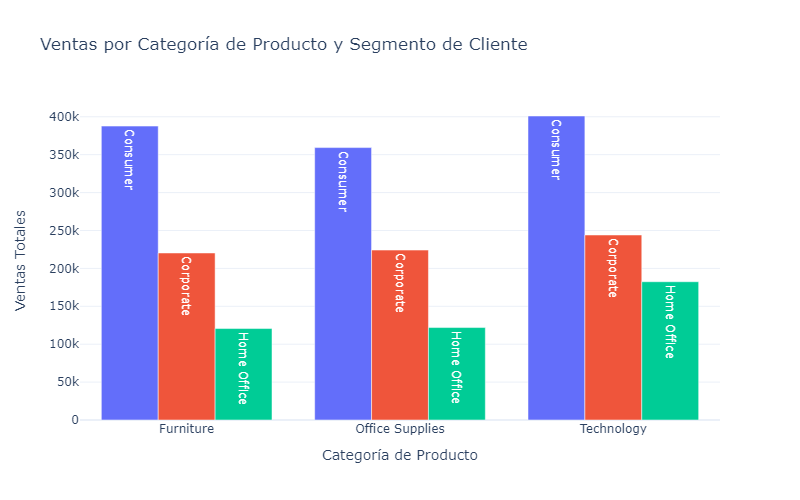

### e) Optimización de la Gráfica para Reducir la Carga Cognitiva 🧠

- **Gráfico de barras agrupado**: Facilita la comparación entre categorías de productos y segmentos de clientes en un formato claro y organizado.
- **Colores distintivos y consistentes**: Usamos una paleta de colores cualitativa de Plotly que proporciona un contraste adecuado sin ser visualmente abrumadora.
- **Interactividad**: La funcionalidad de Plotly permite explorar los valores específicos al pasar el cursor sobre cada barra, sin necesidad de sobrecargar el gráfico con etiquetas adicionales.
- **Diseño limpio**: Eliminamos distracciones visuales innecesarias, como bordes y cuadrículas pesadas, para que el espectador pueda concentrarse en la información clave.

### f) Explicación de Decisiones 💡

El **gráfico de barras agrupado** con Plotly permite ver la distribución de las ventas por categoría de producto y segmento de cliente de una manera clara y ordenada. Esta visualización facilita la comparación entre cada segmento dentro de las categorías, mostrando patrones de ventas relevantes que ayudan a identificar oportunidades estratégicas.

La elección de una paleta cualitativa y el agrupamiento de las barras permiten aplicar los principios de **proximidad** (las barras de cada categoría están agrupadas) y **similitud** (cada segmento está representado con un color consistente), lo que reduce la carga cognitiva y facilita la interpretación. La **interactividad** de Plotly permite que el usuario explore los datos más profundamente al pasar el cursor sobre cada barra, sin añadir etiquetas excesivas que puedan sobrecargar la visualización.

En resumen, esta gráfica con Plotly proporciona una visión precisa y accesible de la distribución de las ventas, permitiendo identificar rápidamente los segmentos y categorías más lucrativos de una manera intuitiva y visualmente atractiva.


---

## Ejercicios Adicionales

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sales = pd.read_csv(convert_to_raw_url(BASE_URL + 'data/additional/Depuracion(ventas unitarias).csv'))
emissions = pd.read_csv(convert_to_raw_url(BASE_URL + 'data/emissions/historical_emissions.csv'))

In [28]:
sales.head()

,date,sold_units,predicted_units
0,2018-01-01,50000000.0,NaN
1,2018-02-01,42000000.0,NaN
2,2018-03-01,44000000.0,NaN
3,2018-04-01,43000000.0,NaN
4,2018-05-01,42500000.0,NaN


In [29]:
emissions.head()

,Country,Data source,Sector,Gas,Unit,2018,2017,2016,2015,2014,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Total including LUCF,CO2,MtCO₂e,36441.55,35588.70,35160.60,34521.91,34558.59,...,24957.30,24895.32,25292.92,24214.92,23890.22,23260.29,23124.00,22988.29,23056.40,22849.92
1,China,CAIT,Total including LUCF,CO2,MtCO₂e,9663.36,9367.67,9164.21,9120.27,9184.77,...,2799.84,2882.75,2779.27,2715.50,2735.48,2414.50,2294.12,2068.77,1952.78,1823.96
2,United States,CAIT,Total including LUCF,CO2,MtCO₂e,4749.57,4581.90,4656.84,4563.52,4683.35,...,5191.66,5172.06,5129.29,4864.46,4708.31,4654.52,4581.76,4461.62,4389.50,4426.40
3,European Union (27),CAIT,Total including LUCF,CO2,MtCO₂e,2636.99,2692.12,2669.54,2321.61,2263.78,...,3079.46,3134.03,3142.23,3210.93,3113.68,3060.09,3072.40,3133.06,3247.48,3286.44
4,India,CAIT,Total including LUCF,CO2,MtCO₂e,2400.25,2267.16,2149.01,2085.38,2072.03,...,683.00,618.73,600.38,555.60,519.98,466.79,431.31,409.09,386.17,341.32


### a. Reducción de carga cognitiva

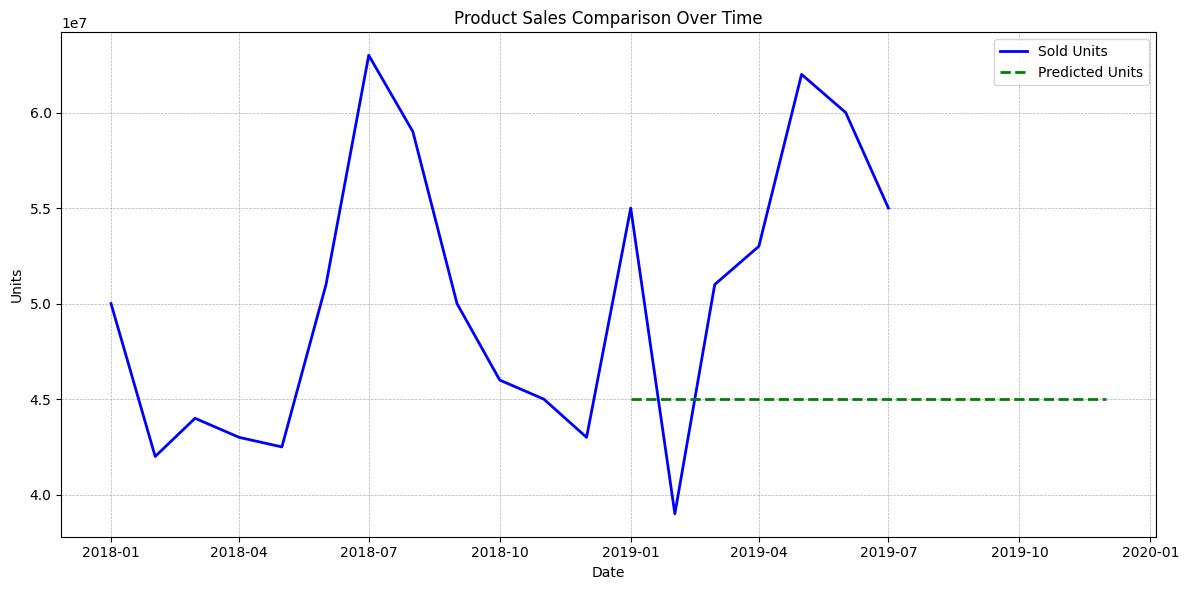

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

sales.columns = ['date', 'sold_units', 'predicted_units']
sales['date'] = pd.to_datetime(sales['date'], format='%b-%y')

plt.figure(figsize=(12, 6))
plt.plot(sales['date'], sales['sold_units'], label='Sold Units', color='blue', linewidth=2)
plt.plot(sales['date'], sales['predicted_units'], label='Predicted Units', color='green', linestyle='--', linewidth=2)

plt.title('Product Sales Comparison Over Time')
plt.xlabel('Date')
plt.ylabel('Units')
plt.legend()
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


💡 Usar gráficos de líneas en lugar de barras reduce la carga cognitiva al presentar los datos de manera simplificada. Las líneas permiten comparar fácilmente las tendencias de las unidades vendidas a lo largo del tiempo. Una menor cantidad de líneas de cuadrícula y una presentación ordenada contribuyen a una visualización más limpia y comprensible.

### b. Cree una visualización que demuestre al menos dos principios de la Gestalt.

In [22]:
year_columns = [str(year) for year in range(1990, 2019)]

df_long = emissions.melt(id_vars=['Country', 'Sector', 'Gas', 'Unit'],
                  value_vars=year_columns,
                  var_name='Year',
                  value_name='Emissions')

df_long['Year'] = df_long['Year'].astype(int)

df_long['Emissions'] = pd.to_numeric(df_long['Emissions'], errors='coerce')

df_long = df_long.dropna(subset=['Emissions'])

print(df_long.head())


               Country                Sector  Gas    Unit  Year  Emissions
0                World  Total including LUCF  CO2  MtCO₂e  1990   22849.92
1                China  Total including LUCF  CO2  MtCO₂e  1990    1823.96
2        United States  Total including LUCF  CO2  MtCO₂e  1990    4426.40
3  European Union (27)  Total including LUCF  CO2  MtCO₂e  1990    3286.44
4                India  Total including LUCF  CO2  MtCO₂e  1990     341.32


                  Country                Sector  Gas    Unit  Year  Emissions
3900                World  Total including LUCF  CO2  MtCO₂e  2010   33328.38
3901                China  Total including LUCF  CO2  MtCO₂e  2010    8138.34
3902        United States  Total including LUCF  CO2  MtCO₂e  2010    4990.96
3903  European Union (27)  Total including LUCF  CO2  MtCO₂e  2010    2900.69
3904                India  Total including LUCF  CO2  MtCO₂e  2010    1670.29


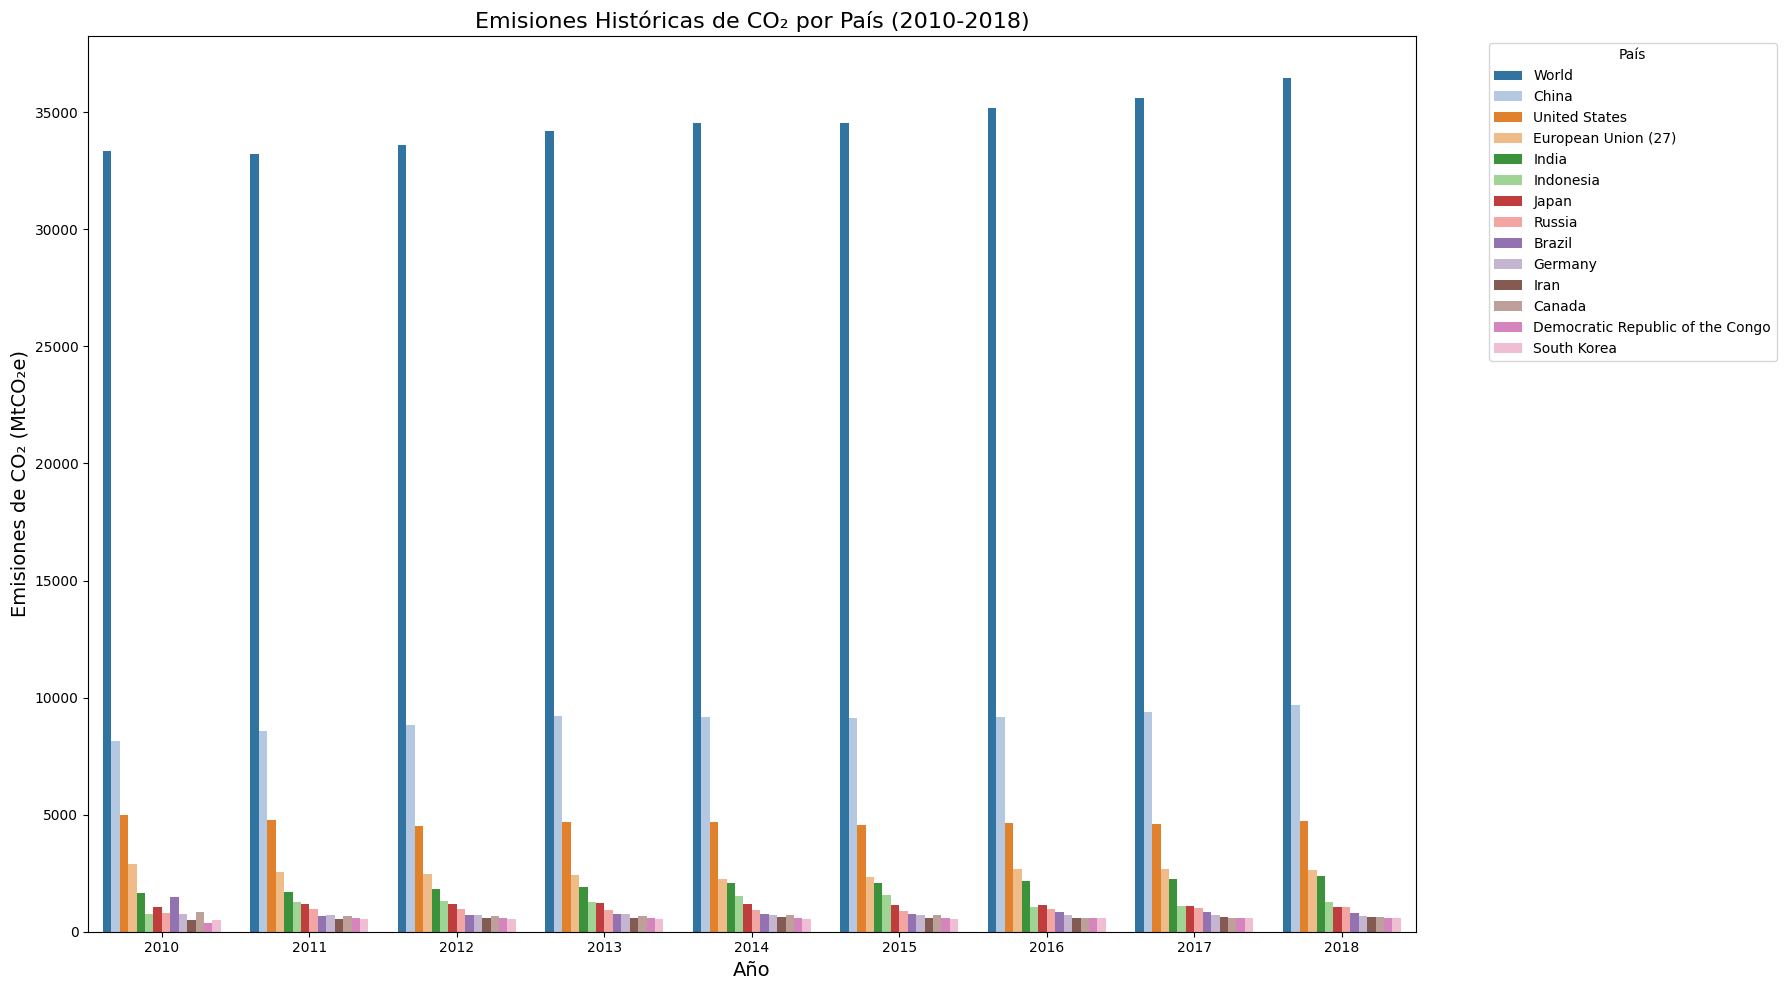

In [23]:
# Top 15 países por emisiones históricas de CO₂
top_countries = ['World', 'China', 'United States', 'European Union (27)',
                'India', 'Indonesia', 'Japan', 'Russia', 'Brazil',
                'Germany', 'Iran', 'Canada', 'Democratic Republic of the Congo',
                'South Korea']

df_filtered = df_long[df_long['Country'].isin(top_countries)]

df_filtered = df_filtered[(df_filtered['Year'] >= 2010) & (df_filtered['Year'] <= 2018)]

print(df_filtered.head())

plt.figure(figsize=(18, 10))

palette = sns.color_palette("tab20", len(top_countries))

sns.barplot(data=df_filtered,
            x='Year',
            y='Emissions',
            hue='Country',
            palette=palette)

plt.xlabel('Año', fontsize=14)
plt.ylabel('Emisiones de CO₂ (MtCO₂e)', fontsize=14)
plt.title('Emisiones Históricas de CO₂ por País (2010-2018)', fontsize=16)

plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

*Similitud*:
Cada país tiene un color específico y consistente a lo largo de todos los años. Esto permite a los espectadores identificar rápidamente las emisiones de un país en particular en diferentes años. <br>

*Proximidad*:
Las barras correspondientes a un mismo año están agrupadas juntas. Esto facilita la comparación de las emisiones entre diferentes países dentro del mismo año, ya que están físicamente cercanas en el gráfico.

### c. (pt.1) Cree una gráfica que intencionalmente sea engañosa 

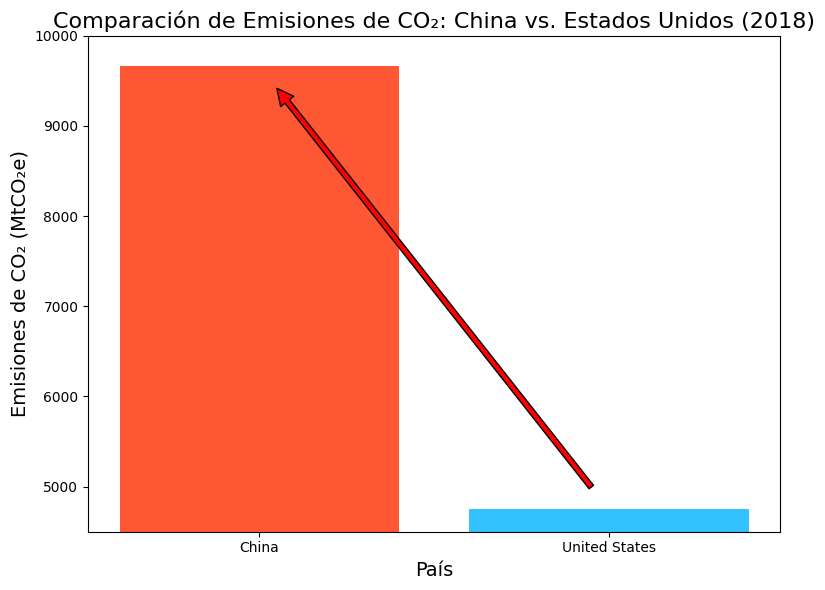

In [24]:
df_filtered = df_long[(df_long['Country'].isin(['China', 'United States'])) &
                      (df_long['Year'] == 2018)]

plt.figure(figsize=(8, 6))

bars = plt.bar(df_filtered['Country'], df_filtered['Emissions'], color=['#FF5733', '#33C1FF'])

plt.xlabel('País', fontsize=14)
plt.ylabel('Emisiones de CO₂ (MtCO₂e)', fontsize=14)
plt.title('Comparación de Emisiones de CO₂: China vs. Estados Unidos (2018)', fontsize=16)

plt.ylim(4500, 10000)   # Aquí anda el truco

plt.annotate('', xy=(0, df_filtered[df_filtered['Country'] == 'China']['Emissions'].values[0]),
             xytext=(1, df_filtered[df_filtered['Country'] == 'United States']['Emissions'].values[0]),
             arrowprops=dict(facecolor='red', shrink=0.05))

# Mostrar la gráfica
plt.tight_layout()
plt.show()

 Al establecer el límite inferior del eje Y en 4,500 MtCO₂e, omitimos valores significativamente más bajos (por ejemplo, las emisiones de Estados Unidos). Esto hace que la barra de Estados Unidos parezca casi inexistente en comparación con la de China. Se sobrestima visualmente la magnitud de las emisiones de China y se minimiza la de Estados Unidos

### c. (pt.2) Encuentre un ejemplo real de una visualización engañosa en medios de comunicación y explique cómo podría corregirse.

![alt text](blog-misleading-gun-deaths-graph.jpeg.avif "Title")

El eje Y está invertido, situando el valor máximo de 800 en la parte inferior. Esta manipulación induce una percepción errónea, sugiriendo que la cantidad de asesinatos por armas disminuyó tras la aprobación de la ley correspondiente, cuando en realidad ocurre lo contrario. La única forma de corregirlo es invirtiendo nuevamente el eje Y, las líneas con pendiente positiva siempre deberían comunicar un aumento (esa es la percepción general).

### d. Analice las diferencias entre una visualización con configuraciones predeterminadas y una optimizada del mismo conjunto de datos.

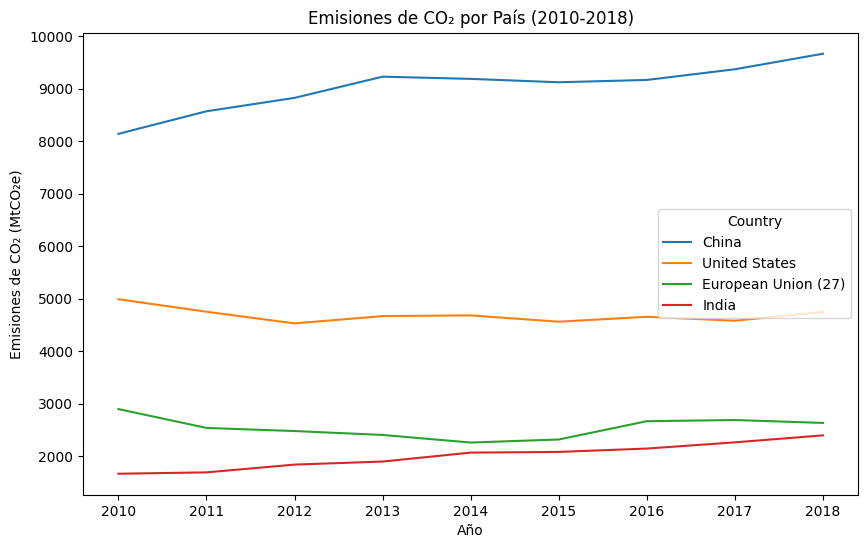

In [25]:
top_countries = ['China', 'United States', 'European Union (27)', 'India']
df_filtered = df_long[df_long['Country'].isin(top_countries)]

# Seleccionar un rango de años, por ejemplo, 2010 a 2018
df_filtered = df_filtered[(df_filtered['Year'] >= 2010) & (df_filtered['Year'] <= 2018)]

# Crear un gráfico de líneas con configuraciones predeterminadas
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x='Year', y='Emissions', hue='Country')

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Emisiones de CO₂ (MtCO₂e)')
plt.title('Emisiones de CO₂ por País (2010-2018)')

# Mostrar la gráfica
plt.show()

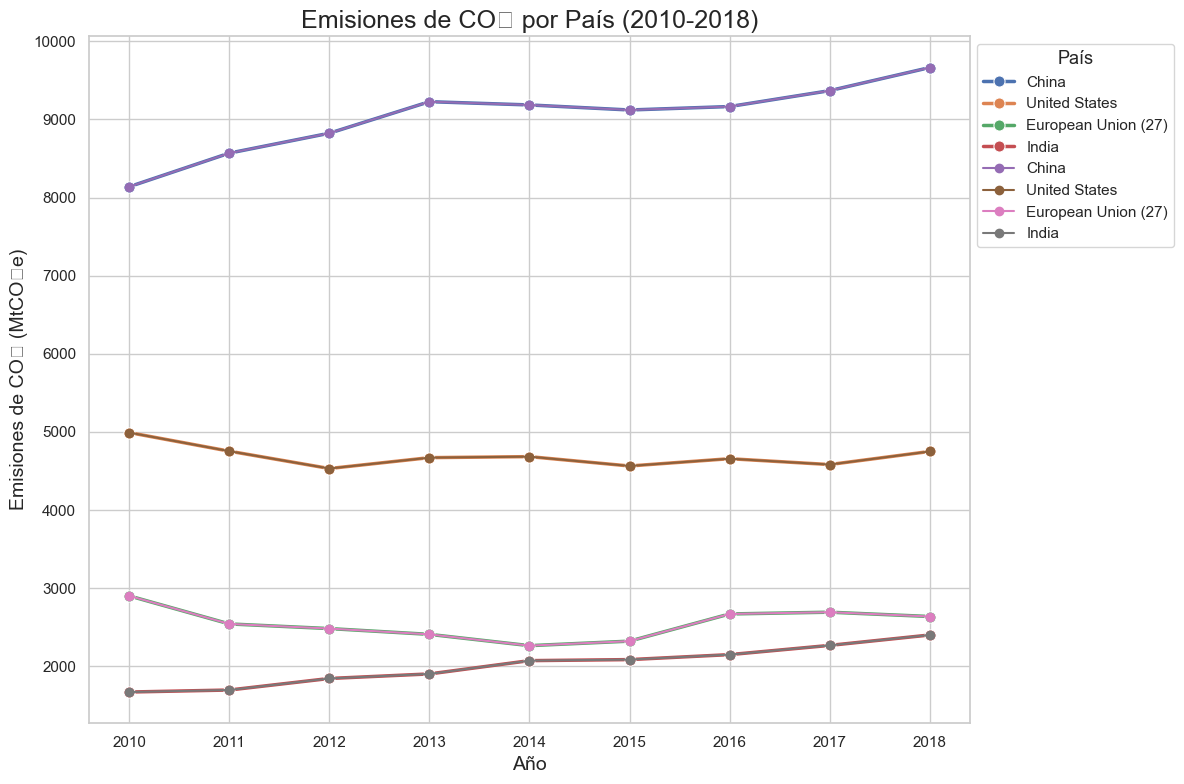

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", color_codes=True)

year_columns = [str(year) for year in range(1990, 2019)]
df_long = emissions.melt(id_vars=['Country', 'Sector', 'Gas', 'Unit'],
                 value_vars=year_columns,
                 var_name='Year',
                 value_name='Emissions')

df_long['Year'] = df_long['Year'].astype(int)
df_long['Emissions'] = pd.to_numeric(df_long['Emissions'], errors='coerce')

df_long = df_long.dropna(subset=['Emissions'])

top_countries = ['China', 'United States', 'European Union (27)', 'India']
df_filtered = df_long[df_long['Country'].isin(top_countries)]

df_filtered = df_filtered[(df_filtered['Year'] >= 2010) & (df_filtered['Year'] <= 2018)]

order = df_filtered[df_filtered['Year'] == 2018].sort_values('Emissions', ascending=False)['Country']

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_filtered, x='Year', y='Emissions', hue='Country',
             palette="deep", marker='o', linewidth=2.5, markersize=8)

for country in top_countries:
    subset = df_filtered[df_filtered['Country'] == country]
    plt.plot(subset['Year'], subset['Emissions'], marker='o', label=country)

plt.xlabel('Año', fontsize=14)
plt.ylabel('Emisiones de CO₂ (MtCO₂e)', fontsize=14)
plt.title('Emisiones de CO₂ por País (2010-2018)', fontsize=18)

plt.legend(title='País', title_fontsize='13', fontsize='11', loc='upper left', bbox_to_anchor=(1, 1))


plt.tight_layout()

plt.show()

| **Aspecto**                  | **Configuraciones Predeterminadas**                | **Visualización Optimizada**                                |
|------------------------------|----------------------------------------------------|-------------------------------------------------------------|
| **Estética**                 | Básica y genérica                                  | Atractiva y coherente                                       |
| **Claridad**                 | Menor claridad, posibles solapamientos             | Mayor claridad, elementos bien distribuidos                 |
| **Uso de Colores**           | Paleta estándar, poca diferenciación               | Paleta consistente y diferenciada para cada país            |
| **Leyenda**                  | Posicionada dentro del gráfico, puede solaparse    | Posicionada fuera del gráfico, clara y legible              |
| **Marcadores y Líneas**      | Líneas finas sin marcadores destacados             | Líneas más gruesas con marcadores claros                    |
| **Anotaciones**              | Ausentes                                           | Incluye anotaciones para resaltar tendencias clave          |
| **Principios de la Gestalt** | Limitados                                          | Similitud y Proximidad claramente aplicados                  |



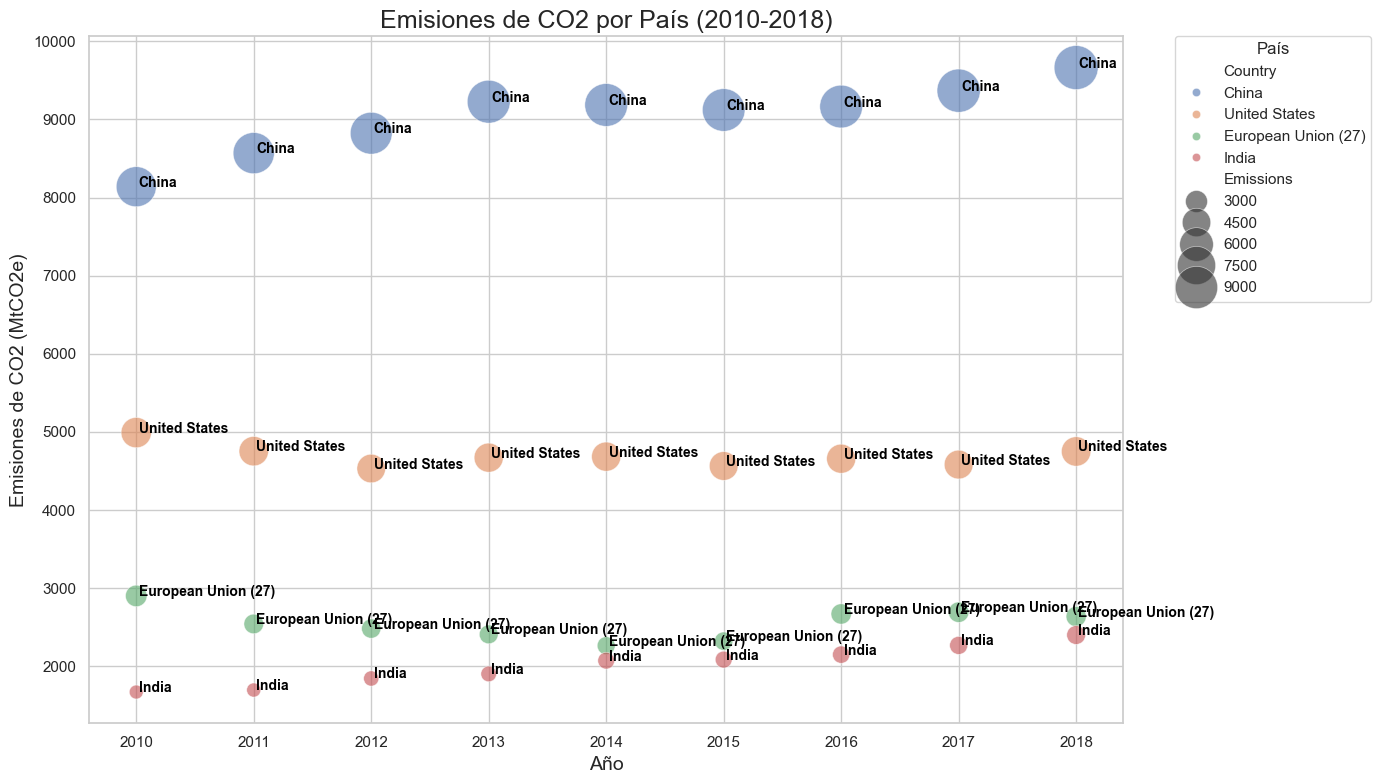

In [27]:
plt.figure(figsize=(14, 8))

bubble = sns.scatterplot(data=df_filtered,
                         x='Year',
                         y='Emissions',
                         hue='Country',
                         size='Emissions',
                         sizes=(100, 1000),
                         alpha=0.6,
                         palette='deep',
                         edgecolor='w',
                         linewidth=0.5)

plt.xlabel('Año', fontsize=14)
plt.ylabel('Emisiones de CO2 (MtCO2e)', fontsize=14)
plt.title('Emisiones de CO2 por País (2010-2018)', fontsize=18)

plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

for line in range(0, df_filtered.shape[0]):
     plt.text(df_filtered.Year.iloc[line]+0.02,
              df_filtered.Emissions.iloc[line],
              df_filtered.Country.iloc[line],
              horizontalalignment='left',
              size='small',
              color='black',
              weight='semibold')

plt.tight_layout()

plt.show()

--- 

## Crítica Constructiva


En el ejercicio de crítica constructiva, intercambiamos visualizaciones con otro equipo (Alejandro Ortega) y recibimos retroalimentación basada en los principios de Excelencia Gráfica e Integridad Gráfica, lo cual permitió una mejora en el entendimiento y claridad para la futura mejora de los gráficos que realicemos.

1. En el gráfico de la evolución de emisiones de CO₂, se resaltó la buena elección de colores y el uso de breakpoints, ya que permiten una clara identificación de hitos clave sin sobrecargar la visualización. Además, se sugirió considerar la variación del grosor de la línea para enfatizar ciertos periodos, lo cual podría facilitar una mejor comprensión de las tendencias mostradas.

2. En la visualización de la distribución de géneros en Netflix mediante un diagrama de Sankey, la retroalimentación se enfocó en la claridad y en la necesidad de una línea guía que permita una lectura más intuitiva de los flujos entre géneros primarios y secundarios. Esto resalta la importancia de los detalles visuales en diagramas de flujo, especialmente para audiencias que no están familiarizadas con este tipo de gráficos.

3. Por último, en el gráfico de ventas por categoría y segmento de cliente se destacó la efectividad de un gráfico de barras agrupadas, sugiriendo que la estructura y el color utilizado eran adecuados para la diferenciación entre categorías y segmentos. La retroalimentación también señaló la buena legibilidad de las etiquetas dentro de las barras, lo cual apoya la interpretación rápida y efectiva de los datos. Se destacó que esta información tambien podría ser representada en un pie chart multinivel.

---

## Reflexiones

Durante el proceso de visualización de datos en el Laboratorio 8, identificamos la importancia de seleccionar el tipo de gráfica adecuado para comunicar eficazmente la información. En el análisis de las **Emisiones Históricas de CO₂**, el uso de un gráfico de líneas interactivo permitió observar tendencias a lo largo del tiempo y resaltar eventos clave que influenciaron las emisiones globales. Esta visualización facilitó la comprensión de cómo factores externos, como el Protocolo de Kioto y el Acuerdo de París, impactaron en las emisiones de CO₂.

En el estudio de los **Títulos de Netflix**, optamos por un diagrama de Sankey para representar la distribución jerárquica de géneros. Esta elección resultó efectiva para mostrar las relaciones entre géneros principales y secundarios, permitiendo identificar fácilmente los subgéneros más destacados. La claridad en la representación de los flujos entre categorías principales y secundarias fue fundamental para entender la diversidad y preferencia de géneros en la plataforma.

Al analizar las **Ventas de Productos**, el gráfico de barras agrupadas proporcionó una visión clara de la distribución de ventas por categoría de producto y segmento de cliente. Esta visualización permitió comparar de manera efectiva el rendimiento de diferentes segmentos dentro de cada categoría, identificando áreas de mayor rendimiento y oportunidades estratégicas para el negocio.

Reflexionando sobre el proceso, aprendimos que la interactividad y la optimización de los gráficos son esenciales para reducir la carga cognitiva del espectador y mejorar la accesibilidad de la información. La incorporación de anotaciones, el uso adecuado de colores y la simplificación del diseño contribuyeron significativamente a la efectividad de nuestras visualizaciones. Además, la experiencia de intercambiar visualizaciones con otros grupos y recibir retroalimentación constructiva nos permitió identificar áreas de mejora y aplicar mejores prácticas en la creación de gráficos.

En resumen, este ejercicio reforzó la importancia de aplicar principios de diseño gráfico y comunicación efectiva en la visualización de datos. La selección adecuada de tipos de gráficas, junto con una optimización cuidadosa, nos permitió presentar información compleja de manera clara y persuasiva, facilitando la toma de decisiones basada en datos.
